## Step 1 – Set Up and Load Image Paths

In [6]:
import os
import shutil
import random
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Define the paths
RAW_DATA_PATH = "../data/raw"  # The folder where my original data is
CLEANED_DATA_PATH = "../data/processed"  # Where I'll save resized/clean images

# Just checking which categories I have
categories = sorted(os.listdir(RAW_DATA_PATH))
print("Found categories:", categories)

Found categories: ['Plant_leave_diseases_dataset_without_augmentation']


In [8]:
RAW_DATA_PATH = "../data/raw/Plant_leave_diseases_dataset_without_augmentation"

In [9]:
categories = sorted(os.listdir(RAW_DATA_PATH))
print("Found categories:", categories)
print("Total classes:", len(categories))

Found categories: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomat

## Step 2 – Resize & Copy All Images to Clean Folder

In [10]:
import os
import shutil
from PIL import Image

# Step 2: Resize and copy images to data/processed/

# Define where to save cleaned images
CLEANED_DATA_PATH = "../data/processed"
IMG_SIZE = (224, 224)

# 1. Clear any existing processed folder (start fresh)
if os.path.exists(CLEANED_DATA_PATH):
    shutil.rmtree(CLEANED_DATA_PATH)
os.makedirs(CLEANED_DATA_PATH)

# 2. Go inside each category and resize images
for category in categories:
    input_folder = os.path.join(RAW_DATA_PATH, category)
    output_folder = os.path.join(CLEANED_DATA_PATH, category)
    os.makedirs(output_folder, exist_ok=True)

    for img_file in os.listdir(input_folder):
        img_path = os.path.join(input_folder, img_file)

        try:
            # Load the image and resize it
            img = Image.open(img_path).convert("RGB")
            img = img.resize(IMG_SIZE)

            # Save it into the cleaned path
            save_path = os.path.join(output_folder, img_file)
            img.save(save_path)

        except Exception as e:
            print(f"Error processing {img_path}: {e}")


## Step 3 – Preview Cleaned Images

Category: Peach___Bacterial_spot


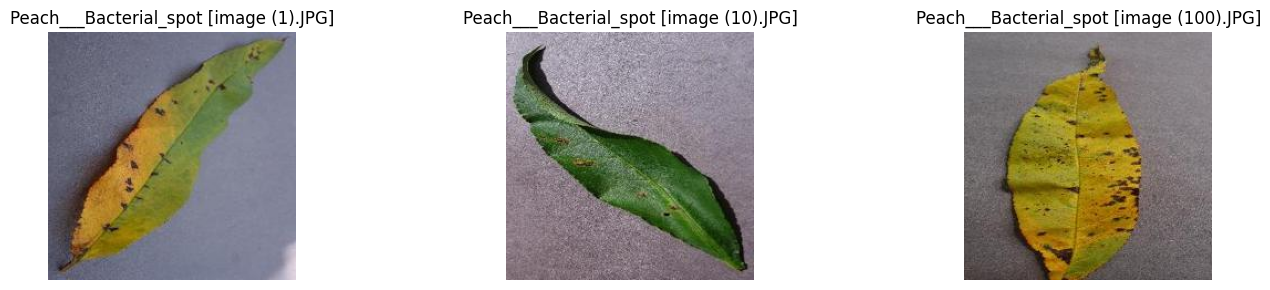

Category: Raspberry___healthy


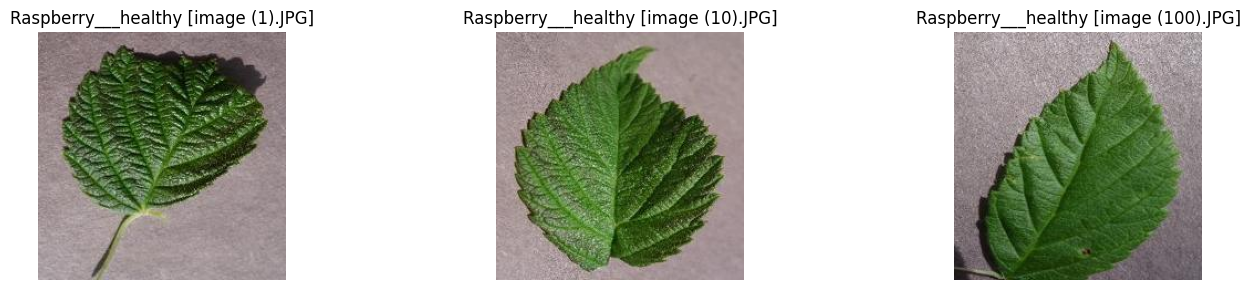

Category: Tomato___Target_Spot


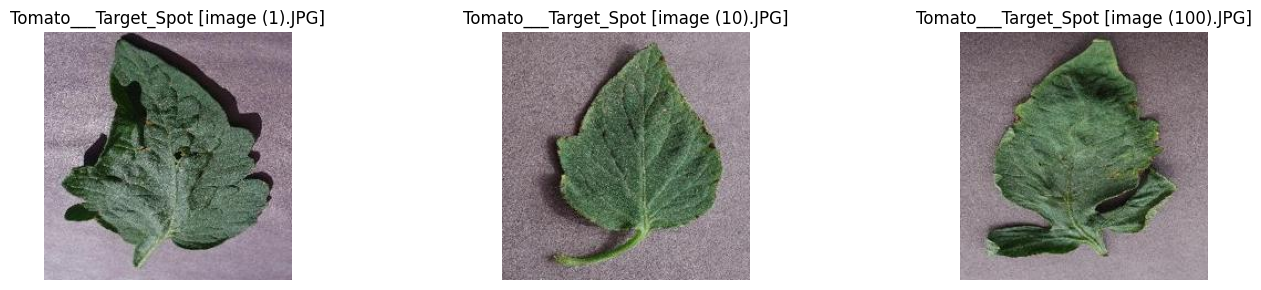

In [27]:
import matplotlib.pyplot as plt

# Pick a few categories to preview
preview_categories = random.sample(categories, 3)

# For each category, show 3 images
for cat in preview_categories:
    cat_path = os.path.join(CLEANED_DATA_PATH, cat)
    images = os.listdir(cat_path)[:3]

    print(f"Category: {cat}")
    plt.figure(figsize=(15, 3))
    
    for i, img_name in enumerate(images):
        img_path = os.path.join(cat_path, img_name)
        img = Image.open(img_path)
        
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(f"{cat} [{img_name}]")
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()